In [3]:
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import np_utils

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 2s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [9]:
X_train[0].shape

(28, 28)

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
import pandas as pd

df = pd.DataFrame(X_train[0])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


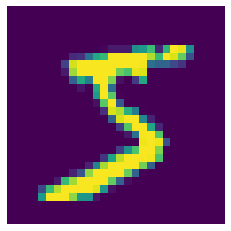

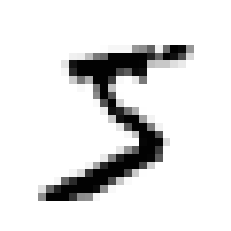

In [22]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')
plt.show()

# 학습 모델 테스트

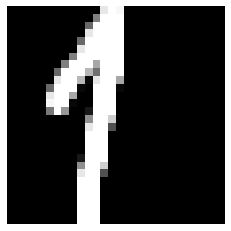

prediction: 8


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('./deeplearning/run_project/model/my_model_mnist.h5')

my = plt.imread('./deeplearning/run_project/model/numbers/1.bmp')

tmp = my[:,:,0]
my1 = tmp.reshape(1, -1).astype('float32') / 255

plt.imshow(my, cmap='Greys')
plt.axis('off')
plt.show()

print(f'prediction: {np.argmax(model.predict(my1))}')

In [47]:
cnt = 0
for i in range(10):
    my = plt.imread('./deeplearning/run_project/model/numbers/'+str(i)+'.bmp')

    tmp = my[:,:,0]
    my1 = tmp.reshape(1, -1).astype('float32') / 255

    print(f'data: {i}, prediction: {np.argmax(model.predict(my1))}')
    if i == np.argmax(model.predict(my1)):
        cnt += 1
    
print(f'accuracy >>> {cnt/10}')

data: 0, prediction: 9
data: 1, prediction: 8
data: 2, prediction: 2
data: 3, prediction: 5
data: 4, prediction: 7
data: 5, prediction: 5
data: 6, prediction: 5
data: 7, prediction: 7
data: 8, prediction: 1
data: 9, prediction: 2
accuracy >>> 0.3
